In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report


C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [2]:
data = pd.read_csv("Pubg_stats.csv")
data.head()

,Unnamed: 0,Player_Name,Matches_Played,Kills,Deaths,Assists,Damage_Dealt,Headshots,Wins,Rank,Revives,Distance_Traveled,Weapons_Used,Time_Survived,Top_10s
0,0,StealthMaster,250,587,143,98,15243,234,32,Gold,67,72560,12,28976,145
1,1,SniperLion,312,823,218,112,18975,312,42,Diamond,95,89042,15,33652,189
2,2,NinjaGamer,186,492,84,56,11786,156,28,Platinum,48,60924,10,21764,97
3,3,ThunderStrike,409,923,267,134,21037,288,55,Silver,128,98234,18,40128,258
4,4,SpeedDemon,143,368,68,42,9865,123,20,Gold,36,52072,8,16834,72


In [3]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
columns_to_drop = ['Unnamed: 0', 'Player_Name','Rank']
columns_to_scale = ['Matches_Played','Kills','Deaths','Assists','Damage_Dealt','Headshots','Wins','Top_10s','Revives','Distance_Traveled','Weapons_Used','Time_Survived']
dropped_columns = data[columns_to_drop]
data_dropped_columns = data.drop(columns_to_drop, axis=1)
scaled_features = scalar.fit_transform(data_dropped_columns)
df_scaled_features = pd.DataFrame(scaled_features, columns = columns_to_scale)
integrated_df = pd.concat([df_scaled_features, dropped_columns], axis=1)


In [4]:
from sklearn.model_selection import train_test_split
X = df_scaled_features
Y = data['Rank']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2) 

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = "gini", 
                             max_depth = 8,
                            min_samples_split = 10,
                            random_state = 5)

In [6]:
 clf.fit(x_train,y_train)

C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [7]:
clf.feature_importances_

array([0.00748346, 0.01815677, 0.31116987, 0.05087089, 0.23411227,
       0.07188786, 0.01679021, 0.00897894, 0.13071411, 0.00178214,
       0.08712066, 0.06093281])

In [9]:
y_pred = clf.predict(x_test)

C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [10]:
y_pred

array(['Diamond', 'Diamond', 'Gold', 'Platinum', 'Gold', 'Platinum',
       'Platinum', 'Diamond', 'Platinum', 'Platinum', 'Platinum',
       'Platinum', 'Diamond', 'Gold', 'Platinum', 'Silver', 'Gold',
       'Platinum', 'Platinum', 'Gold', 'Diamond', 'Platinum', 'Platinum',
       'Diamond', 'Diamond', 'Platinum', 'Diamond', 'Platinum', 'Diamond',
       'Diamond', 'Gold', 'Platinum', 'Diamond', 'Platinum', 'Diamond',
       'Gold', 'Diamond', 'Platinum', 'Gold', 'Gold', 'Gold', 'Diamond',
       'Diamond', 'Gold', 'Platinum'], dtype=object)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[15,  0,  0,  0],
       [ 0,  9,  0,  0],
       [ 0,  2, 18,  0],
       [ 0,  0,  0,  1]], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9555555555555556

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,x_train,y_train,cv=10)

C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning:

C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Saad\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

array([0.78947368, 0.84210526, 0.84210526, 1.        , 0.94444444,
       0.94444444, 0.94117647, 0.9375    , 0.9375    , 0.875     ])

In [16]:
cm = confusion_matrix(y_test , y_pred)

In [17]:
cm

array([[15,  0,  0,  0],
       [ 0,  9,  0,  0],
       [ 0,  2, 18,  0],
       [ 0,  0,  0,  1]], dtype=int64)

Text(15.0, 0.5, 'Truth')

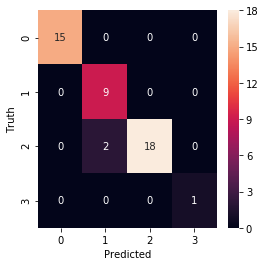

In [23]:

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(4,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [24]:
Acc = accuracy_score (y_test, y_pred)


In [25]:
Acc

0.9555555555555556

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Diamond       1.00      1.00      1.00        15
        Gold       0.82      1.00      0.90         9
    Platinum       1.00      0.90      0.95        20
      Silver       1.00      1.00      1.00         1

    accuracy                           0.96        45
   macro avg       0.95      0.97      0.96        45
weighted avg       0.96      0.96      0.96        45

